In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

/tmp/ipykernel_126234/1438236441.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
years = np.arange(1,16)
csvs = [f"data/gdp_with_shares{year:02}.csv" for year in years]

In [3]:
csvs

['data/gdp_with_shares01.csv',
 'data/gdp_with_shares02.csv',
 'data/gdp_with_shares03.csv',
 'data/gdp_with_shares04.csv',
 'data/gdp_with_shares05.csv',
 'data/gdp_with_shares06.csv',
 'data/gdp_with_shares07.csv',
 'data/gdp_with_shares08.csv',
 'data/gdp_with_shares09.csv',
 'data/gdp_with_shares10.csv',
 'data/gdp_with_shares11.csv',
 'data/gdp_with_shares12.csv',
 'data/gdp_with_shares13.csv',
 'data/gdp_with_shares14.csv',
 'data/gdp_with_shares15.csv']

In [4]:
df = pd.read_csv(csvs[0], encoding='latin1', delimiter=";",
                decimal=",")

In [5]:
df.head()

COD_PRO        PROVINCIA        X2001   p2001      PI01
0      102    Vibo Valentia  11771.92982  170800  0.002998
1      106  Medio Campidano  11952.38095  105400  0.001850
2       84        Agrigento  12178.57143  448300  0.007868
3       86             Enna  12774.01130  177100  0.003108
4      105        Ogliastra  12775.86207   58400  0.001025

In [6]:
dfs = []
dfs.append(df)
for csv in csvs[1:]:
    df = pd.read_csv(csv, encoding='latin1', delimiter=";",
                decimal=",")
    dfs.append(df.iloc[:,-3:])
    

In [7]:
df = pd.concat(dfs, axis=1)

In [8]:
df.dtypes

COD_PRO        int64
PROVINCIA     object
X2001        float64
p2001          int64
PI01         float64
X2002        float64
p2002          int64
PI02         float64
X2003        float64
p2003          int64
PI03         float64
X2004        float64
p2004          int64
PI04         float64
X2005        float64
p2005          int64
PI05         float64
X2006        float64
p2006          int64
PI06         float64
X2007        float64
p2007          int64
PI07         float64
X2008        float64
p2008          int64
PI08         float64
X2009        float64
p2009          int64
PI09         float64
X2010        float64
p2010          int64
PI10         float64
X2011        float64
p2011          int64
PI11         float64
X2012        float64
p2012          int64
PI12         float64
X2013        float64
p2013          int64
PI13         float64
X2014        float64
p2014          int64
PI14         float64
X2015        float64
p2015          int64
PI15         float64
dtype: object

In [9]:
df.shape

(110, 47)

In [10]:
gdf = gpd.read_file("data/Prov2011_g_WGS84.shp")

<Axes: >

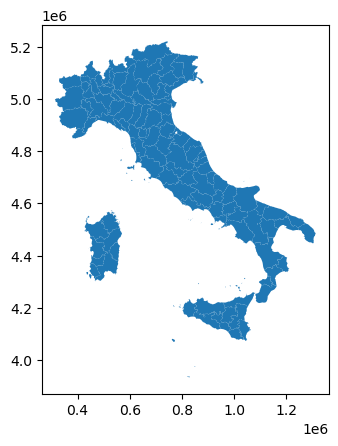

In [11]:
gdf.plot()

In [12]:
gdf.head()

COD_RIP  COD_REG  COD_PROV               DEN_PROV SIGLA     Shape_Leng  \
0        4       15        63                 Napoli    NA  360272.889148   
1        3        9       100                  Prato    PO  118971.508738   
2        4       18        79              Catanzaro    CZ  326831.080035   
3        4       16       110  Barletta-Andria-Trani    BT  237524.136678   
4        3        9        46                  Lucca    LU  211642.633672   

     Shape_Area                                           geometry  
0  1.175220e+09  MULTIPOLYGON (((935240.177 4530273.402, 935755...  
1  3.658265e+08  POLYGON ((673895.993 4886075.200, 673938.992 4...  
2  2.416963e+09  POLYGON ((1159184.505 4363389.106, 1159334.005...  
3  1.541951e+09  POLYGON ((1081237.144 4611047.023, 1081399.392...  
4  1.772686e+09  POLYGON ((604374.353 4904259.584, 605257.065 4...

In [13]:
gdf.shape

(110, 8)

In [14]:
df.head()

COD_PRO        PROVINCIA        X2001   p2001      PI01        X2002  \
0      102    Vibo Valentia  11771.92982  170800  0.002998  12142.85714   
1      106  Medio Campidano  11952.38095  105400  0.001850  12447.05882   
2       84        Agrigento  12178.57143  448300  0.007868  13000.00000   
3       86             Enna  12774.01130  177100  0.003108  13322.03390   
4      105        Ogliastra  12775.86207   58400  0.001025  13465.51724   

    p2002      PI02        X2003   p2003  ...      PI12        X2013   p2013  \
0  105100  0.001841  12657.14286  104700  ...  0.001679  13089.10891  100900   
1  170000  0.002977  12894.11765  169500  ...  0.002136  14348.83721  128600   
2  447900  0.007844  13592.42762  448600  ...  0.006543  14505.07614  394100   
3  176800  0.003096  13688.31169  385400  ...  0.007481  14656.44172  163400   
4   58200  0.001019  13801.52672  131300  ...  0.002713  14722.22222  449700   

       PI13        X2014   p2014      PI14        X2015   p2015      PI15  
0  0.001664  13900.00000  100400  0.001652  14340.00000   99700  0.001642  
1  0.002120  14578.12500  448300  0.007375  14704.03587  446400  0.007350  
2  0.006498  14621.82741  394100  0.006483  14944.16244  394000  0.006488  
3  0.002694  14650.30675  163200  0.002685  15012.26994  162800  0.002681  
4  0.007415  14664.81224  718500  0.011820  15044.69274  716000  0.011790  

[5 rows x 47 columns]

In [15]:
m = gdf.merge(df, left_on='COD_PROV', right_on="COD_PRO")

In [16]:
m.head()

COD_RIP  COD_REG  COD_PROV               DEN_PROV SIGLA     Shape_Leng  \
0        4       15        63                 Napoli    NA  360272.889148   
1        3        9       100                  Prato    PO  118971.508738   
2        4       18        79              Catanzaro    CZ  326831.080035   
3        4       16       110  Barletta-Andria-Trani    BT  237524.136678   
4        3        9        46                  Lucca    LU  211642.633672   

     Shape_Area                                           geometry  COD_PRO  \
0  1.175220e+09  MULTIPOLYGON (((935240.177 4530273.402, 935755...       63   
1  3.658265e+08  POLYGON ((673895.993 4886075.200, 673938.992 4...      100   
2  2.416963e+09  POLYGON ((1159184.505 4363389.106, 1159334.005...       79   
3  1.541951e+09  POLYGON ((1081237.144 4611047.023, 1081399.392...      110   
4  1.772686e+09  POLYGON ((604374.353 4904259.584, 605257.065 4...       46   

               PROVINCIA  ...      PI12        X2013   p2013      PI13  \
0                 Napoli  ...  0.051333  17773.58491  317900  0.005242   
1                  Prato  ...  0.014397  31134.90364  934300  0.015406   
2              Catanzaro  ...  0.002852  16371.18644  590000  0.009729   
3  Barletta-Andria-Trani  ...  0.013474  15132.94798  172900  0.002851   
4                  Lucca  ...  0.009248  23812.50000  176300  0.002907   

         X2014    p2014      PI14        X2015   p2015      PI15  
0  17655.17241  1276100  0.020992  18146.00551  363400  0.005984  
1  32381.35593   235900  0.003881  33415.25424  235500  0.003878  
2  15662.79070   171800  0.002826  16660.98807  587200  0.009669  
3  15265.62500   128200  0.002109  15447.24771  436000  0.007179  
4  23915.03268   305800  0.005031  24186.83274  561600  0.009247  

[5 rows x 55 columns]

<Axes: >

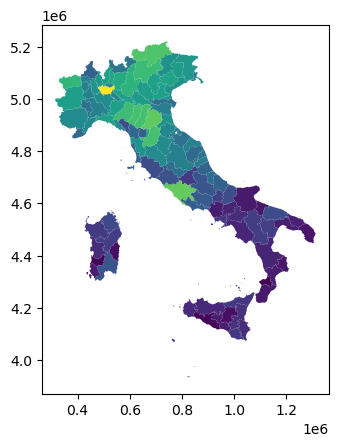

In [17]:
m.plot(column='X2001')

In [18]:
m.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
m.explore(column='X2001', tooltip=['X2001'])

In [20]:
m.p2001 / m.p2001.sum() # I think the shares are with regard to national population

0      0.053733
1      0.004010
2      0.006492
3      0.006730
4      0.006536
         ...   
105    0.005662
106    0.002945
107    0.001025
108    0.002315
109    0.002883
Name: p2001, Length: 110, dtype: float64

In [21]:
m.columns

Index(['COD_RIP', 'COD_REG', 'COD_PROV', 'DEN_PROV', 'SIGLA', 'Shape_Leng',
       'Shape_Area', 'geometry', 'COD_PRO', 'PROVINCIA', 'X2001', 'p2001',
       'PI01', 'X2002', 'p2002', 'PI02', 'X2003', 'p2003', 'PI03', 'X2004',
       'p2004', 'PI04', 'X2005', 'p2005', 'PI05', 'X2006', 'p2006', 'PI06',
       'X2007', 'p2007', 'PI07', 'X2008', 'p2008', 'PI08', 'X2009', 'p2009',
       'PI09', 'X2010', 'p2010', 'PI10', 'X2011', 'p2011', 'PI11', 'X2012',
       'p2012', 'PI12', 'X2013', 'p2013', 'PI13', 'X2014', 'p2014', 'PI14',
       'X2015', 'p2015', 'PI15'],
      dtype='object')

## Index

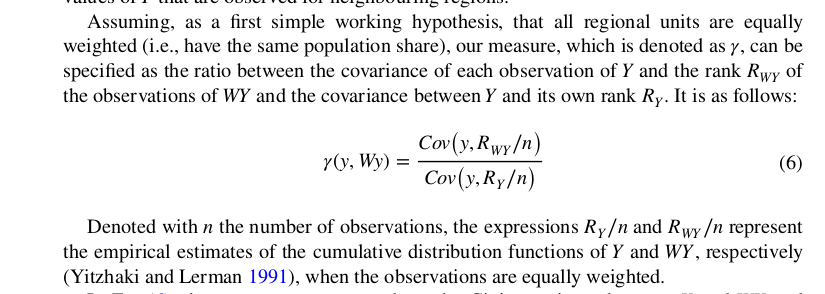

In [22]:
import libpysal.weights as weights

In [23]:
w = weights.Queen.from_dataframe(gdf)

/tmp/ipykernel_126234/2480022378.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(gdf)
/home/serge/miniforge3/envs/pysal/lib/python3.12/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


In [24]:
w.transform = 'r'

In [25]:
y = m.X2015
wy = weights.lag_spatial(w, y)

In [26]:
y

0      18146.00551
1      33415.25424
2      16660.98807
3      15447.24771
4      24186.83274
          ...     
105    18318.51852
106    17475.30864
107    15044.69274
108    15795.03106
109    18626.58228
Name: X2015, Length: 110, dtype: float64

In [27]:
wy

array([17106.313495  , 32652.38806333, 15595.5654675 , 18793.74067667,
       30006.639585  , 30342.73351667, 18305.23008   , 18276.25820667,
       30784.57499167, 18179.159648  , 24617.796764  , 28658.05764857,
       26701.51893429, 23558.82962667, 22015.664814  , 23869.3166525 ,
       27165.9162    , 30102.762908  , 28171.19922333, 17802.89336   ,
       29492.85342143, 18460.071115  , 28771.36958333, 26915.594365  ,
       28645.270835  , 16868.59668   , 29923.60300714, 28572.1288125 ,
       32291.533015  , 22894.940855  , 31377.280168  , 26905.46059   ,
       24987.953515  , 18376.040654  , 25277.70120875, 28874.79964429,
       28642.99719   , 16500.        , 32098.76154   , 27143.475964  ,
       29114.892842  , 30005.402745  , 28733.49977   , 16187.79133   ,
       29153.46601   , 33356.811044  , 35087.045942  , 33118.3408    ,
       25022.63322667, 25954.425775  , 29759.161945  , 35482.1707625 ,
       30228.6655425 , 17753.71546286, 26092.6057125 , 24948.54336   ,
      

In [28]:
df = pd.DataFrame([y, wy]).T

In [29]:
df

X2015     Unnamed 0
0    18146.00551  17106.313495
1    33415.25424  32652.388063
2    16660.98807  15595.565468
3    15447.24771  18793.740677
4    24186.83274  30006.639585
..           ...           ...
105  18318.51852  18844.970910
106  17475.30864  18614.052655
107  15044.69274  20716.828115
108  15795.03106  18755.554910
109  18626.58228  18815.723132

[110 rows x 2 columns]

In [30]:
df.columns=['y', 'wy']
rdf = df.rank(axis=0)
rdf.columns=['ry', 'rwy']

cdf = pd.concat([df, rdf], axis=1)

cvc = cdf.cov()

In [31]:
cvc

y            wy             ry            rwy
y    4.700352e+07  3.060491e+07  211912.716030  162028.549418
wy   3.060491e+07  3.378971e+07  151762.441719  181928.660642
ry   2.119127e+05  1.517624e+05    1017.500000     806.665138
rwy  1.620285e+05  1.819287e+05     806.665138    1017.500000

In [32]:
cvc = cvc.values

gamma = cvc[0,3] / cvc[0,2]

gamma

0.7646004093244969

In [33]:
# normalize for a cdf


In [34]:
df.columns=['y', 'wy']
rdf = df.rank(axis=0)
rdf.columns=['ry', 'rwy']
rdf = rdf/rdf.shape[0]

cdf = pd.concat([df, rdf], axis=1)

cvc = cdf.cov()

In [35]:
def gamma(y, w):
    wy = weights.lag_spatial(w, y)
    df = pd.DataFrame([y, wy]).T
    n = df.shape[0]
    rdf = df.rank(axis=0) / n
    cdf = pd.concat([df, rdf], axis=1)
    cvc = cdf.cov().values
    _stat = cvc[0,3] / cvc[0,2]
    return _stat

In [36]:
gamma(y, w)

0.7646004093244972

In [37]:
Y = m[[f'X{year}' for year in range(2001, 2016)]]

In [38]:
gammas = [ gamma(y, w) for y in Y.T.values]

In [39]:
gammas

[0.7852916726477879,
 0.7907039770668544,
 0.7936860608697264,
 0.7929184654660867,
 0.7869621842697382,
 0.7905519515475541,
 0.7900094301244361,
 0.7736265888606416,
 0.7723811503537626,
 0.7706627902716133,
 0.7733597959264197,
 0.7626110566675927,
 0.7650386169125842,
 0.7708382763630932,
 0.7646004093244972]

In [40]:
import matplotlib.pyplot as plt

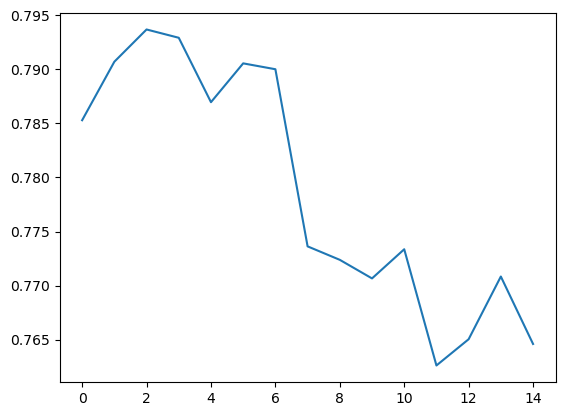

In [41]:
plt.plot(gammas)

In [42]:
wknn5 = weights.KNN.from_dataframe(m, k=5)

/home/serge/miniforge3/envs/pysal/lib/python3.12/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [43]:
wknn5.transform='r'

In [44]:
gammas5 = [ gamma(y, wknn5) for y in Y.T.values]

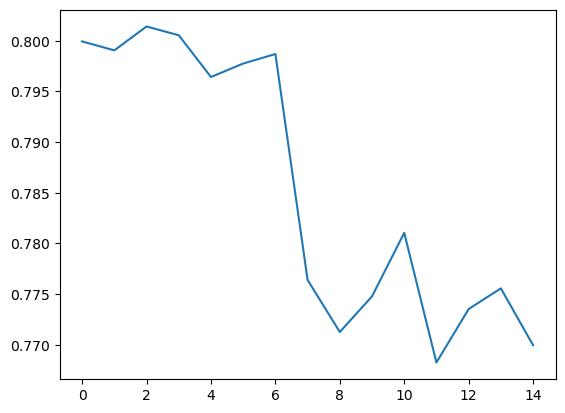

In [45]:
plt.plot(gammas5)

In [46]:
m.columns

Index(['COD_RIP', 'COD_REG', 'COD_PROV', 'DEN_PROV', 'SIGLA', 'Shape_Leng',
       'Shape_Area', 'geometry', 'COD_PRO', 'PROVINCIA', 'X2001', 'p2001',
       'PI01', 'X2002', 'p2002', 'PI02', 'X2003', 'p2003', 'PI03', 'X2004',
       'p2004', 'PI04', 'X2005', 'p2005', 'PI05', 'X2006', 'p2006', 'PI06',
       'X2007', 'p2007', 'PI07', 'X2008', 'p2008', 'PI08', 'X2009', 'p2009',
       'PI09', 'X2010', 'p2010', 'PI10', 'X2011', 'p2011', 'PI11', 'X2012',
       'p2012', 'PI12', 'X2013', 'p2013', 'PI13', 'X2014', 'p2014', 'PI14',
       'X2015', 'p2015', 'PI15'],
      dtype='object')

In [47]:
m.PI10.sum()

1.000000002

In [48]:
rdf

ry       rwy
0    0.236364  0.100000
1    0.900000  0.945455
2    0.127273  0.018182
3    0.072727  0.290909
4    0.463636  0.781818
..        ...       ...
105  0.263636  0.309091
106  0.200000  0.263636
107  0.045455  0.327273
108  0.100000  0.281818
109  0.281818  0.300000

[110 rows x 2 columns]

In [49]:
cdf

y            wy        ry       rwy
0    18146.00551  17106.313495  0.236364  0.100000
1    33415.25424  32652.388063  0.900000  0.945455
2    16660.98807  15595.565468  0.127273  0.018182
3    15447.24771  18793.740677  0.072727  0.290909
4    24186.83274  30006.639585  0.463636  0.781818
..           ...           ...       ...       ...
105  18318.51852  18844.970910  0.263636  0.309091
106  17475.30864  18614.052655  0.200000  0.263636
107  15044.69274  20716.828115  0.045455  0.327273
108  15795.03106  18755.554910  0.100000  0.281818
109  18626.58228  18815.723132  0.281818  0.300000

[110 rows x 4 columns]

In [50]:
cvc = cvc.values

gamma = cvc[0,3] / cvc[0,2]

gamma

0.7646004093244972

In [51]:
# normalizing the ranks doesn't impact the gamma value

## add weighted version next
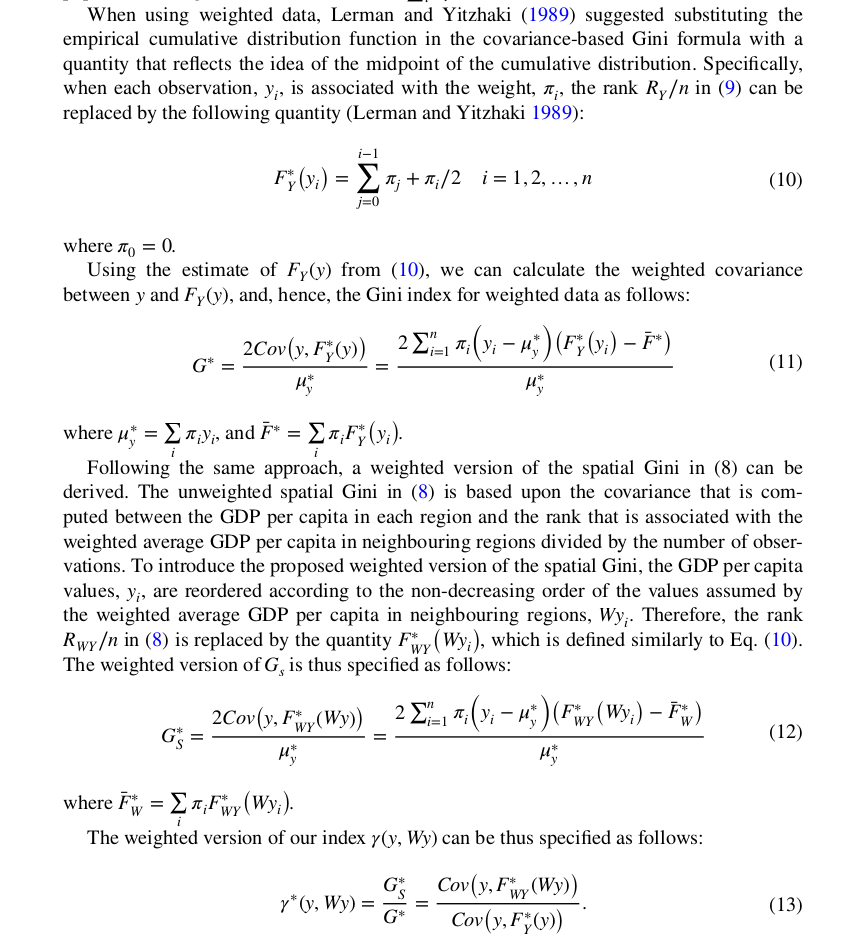

In [52]:
def ecdf_col(df, column=None, inplace=False):
    
    c = df.sort_values(by=column)[column].cumsum()
    c = c/c.max()
    new_vname = f'{column}_ecdf'
    values = c.iloc[c.index]
    if inplace:
        df[new_vname] = values
    else:
        cdf = df.copy()
        cdf[new_vname] = values
        return cdf
    
    

In [53]:
cdf = ecdf_col(m, column='PI10')

In [54]:
cdf[['PI10', 'PI10_ecdf']]

PI10  PI10_ecdf
0    0.002684   0.018655
1    0.015121   0.611555
2    0.009271   0.401529
3    0.002164   0.008427
4    0.004864   0.125206
..        ...        ...
105  0.020918   0.771311
106  0.007297   0.315565
107  0.002756   0.024120
108  0.007276   0.308267
109  0.005230   0.145924

[110 rows x 2 columns]

In [55]:
cdf.PI10_ecdf.max()

1.0

In [56]:
s = m.PI15

In [57]:
s

0      0.005984
1      0.003878
2      0.009669
3      0.007179
4      0.009247
         ...   
105    0.006661
106    0.002669
107    0.011790
108    0.013260
109    0.002597
Name: PI15, Length: 110, dtype: float64

In [58]:
inc = m.X2015

In [59]:
inc

0      18146.00551
1      33415.25424
2      16660.98807
3      15447.24771
4      24186.83274
          ...     
105    18318.51852
106    17475.30864
107    15044.69274
108    15795.03106
109    18626.58228
Name: X2015, Length: 110, dtype: float64

In [60]:
sinc = s*inc

In [61]:
df = pd.DataFrame(data=np.array([s,inc]).T, columns=['s','inc'])

In [62]:

df

s          inc
0    0.005984  18146.00551
1    0.003878  33415.25424
2    0.009669  16660.98807
3    0.007179  15447.24771
4    0.009247  24186.83274
..        ...          ...
105  0.006661  18318.51852
106  0.002669  17475.30864
107  0.011790  15044.69274
108  0.013260  15795.03106
109  0.002597  18626.58228

[110 rows x 2 columns]

In [63]:
df['sinc'] = df.s * df.inc

In [64]:
df

s          inc        sinc
0    0.005984  18146.00551  108.582140
1    0.003878  33415.25424  129.577071
2    0.009669  16660.98807  161.093944
3    0.007179  15447.24771  110.899607
4    0.009247  24186.83274  223.665269
..        ...          ...         ...
105  0.006661  18318.51852  122.011647
106  0.002669  17475.30864   46.644482
107  0.011790  15044.69274  177.373512
108  0.013260  15795.03106  209.445302
109  0.002597  18626.58228   48.367907

[110 rows x 3 columns]

In [65]:
rdf = df.rank(axis=0) / df.shape[0]

In [66]:
rdf

s       inc      sinc
0    0.490909  0.236364  0.345455
1    0.272727  0.900000  0.454545
2    0.736364  0.127273  0.554545
3    0.618182  0.072727  0.354545
4    0.718182  0.463636  0.718182
..        ...       ...       ...
105  0.572727  0.263636  0.409091
106  0.100000  0.200000  0.072727
107  0.800000  0.045455  0.627273
108  0.809091  0.100000  0.700000
109  0.063636  0.281818  0.081818

[110 rows x 3 columns]

## Weighted
### TODO
- how to use a weighted lag
- s w y  or w s y

In [67]:
m.columns

Index(['COD_RIP', 'COD_REG', 'COD_PROV', 'DEN_PROV', 'SIGLA', 'Shape_Leng',
       'Shape_Area', 'geometry', 'COD_PRO', 'PROVINCIA', 'X2001', 'p2001',
       'PI01', 'X2002', 'p2002', 'PI02', 'X2003', 'p2003', 'PI03', 'X2004',
       'p2004', 'PI04', 'X2005', 'p2005', 'PI05', 'X2006', 'p2006', 'PI06',
       'X2007', 'p2007', 'PI07', 'X2008', 'p2008', 'PI08', 'X2009', 'p2009',
       'PI09', 'X2010', 'p2010', 'PI10', 'X2011', 'p2011', 'PI11', 'X2012',
       'p2012', 'PI12', 'X2013', 'p2013', 'PI13', 'X2014', 'p2014', 'PI14',
       'X2015', 'p2015', 'PI15'],
      dtype='object')

In [68]:
def gamma(y, w):
    wy = weights.lag_spatial(w, y)
    df = pd.DataFrame([y, wy]).T
    n = df.shape[0]
    rdf = df.rank(axis=0) / n
    cdf = pd.concat([df, rdf], axis=1)
    cvc = cdf.cov().values
    _stat = cvc[0,3] / cvc[0,2]
    return _stat

In [69]:
m.p2001

0      3061700
1       228500
2       369900
3       383500
4       372400
        ...   
105     322600
106     167800
107      58400
108     131900
109     164300
Name: p2001, Length: 110, dtype: int64

In [70]:
m.PI01.sum()

1.000000002

In [71]:
# weighted values
sX = []
for year in years:
    print(year)
    s = f'PI{year:02}'
    x = f'X{2000+year}'
    sX.append(m[s] *  m[x])
    print(s)

1
PI01
2
PI02
3
PI03
4
PI04
5
PI05
6
PI06
7
PI07
8
PI08
9
PI09
10
PI10
11
PI11
12
PI12
13
PI13
14
PI14
15
PI15


In [72]:
def gamma(y, w, s):
    sy = s * y
    wy = weights.lag_spatial(w, sy)
    df = pd.DataFrame([y, wy, sy]).T
    n = df.shape[0]
    rdf = df.rank(axis=0) / n
    cdf = pd.concat([df, rdf], axis=1)
    cvc = cdf.cov().values
    _stat = cvc[0,3] / cvc[0,-1]
    return _stat

In [73]:
gamma(m.X2015, w, m.PI15)

1.7768812848615791

In [74]:
y = m.X2015

In [75]:
pii = m.PI15

In [76]:
df = pd.DataFrame(data=np.array([y,pii]).T, columns=['y', 'pi'])

df

y        pi
0    18146.00551  0.005984
1    33415.25424  0.003878
2    16660.98807  0.009669
3    15447.24771  0.007179
4    24186.83274  0.009247
..           ...       ...
105  18318.51852  0.006661
106  17475.30864  0.002669
107  15044.69274  0.011790
108  15795.03106  0.013260
109  18626.58228  0.002597

[110 rows x 2 columns]

In [77]:
df.rank(axis=0)

y    pi
0    26.0  54.0
1    99.0  30.0
2    14.0  81.0
3     8.0  68.0
4    51.0  79.0
..    ...   ...
105  29.0  63.0
106  22.0  11.0
107   5.0  88.0
108  11.0  89.0
109  31.0   7.0

[110 rows x 2 columns]

In [78]:
df.sort_values(by='pi').head()

y        pi
19  17275.86207  0.000947
21  19114.94253  0.001426
43  14340.00000  0.001642
6   16000.00000  0.002099
91  34406.25000  0.002104

In [79]:
df.sort_values(by='pi').tail()

y        pi
94  18228.41444  0.020980
66  30303.89156  0.037658
95  18149.22978  0.051310
20  50781.14268  0.052735
68  34626.81410  0.071485

In [80]:
dfs = df.sort_values(by='y')

In [81]:
dfs['pi2'] = dfs.pi/2

In [82]:
dfs.head()

y        pi       pi2
43   14340.00000  0.001642  0.000821
102  14704.03587  0.007350  0.003675
99   14944.16244  0.006488  0.003244
98   15012.26994  0.002681  0.001340
107  15044.69274  0.011790  0.005895

In [83]:
dfs['F'] = dfs.pi2.cumsum()

In [84]:
dfs

y        pi       pi2         F
43   14340.00000  0.001642  0.000821  0.000821
102  14704.03587  0.007350  0.003675  0.004496
99   14944.16244  0.006488  0.003244  0.007740
98   15012.26994  0.002681  0.001340  0.009080
107  15044.69274  0.011790  0.005895  0.014975
..           ...       ...       ...       ...
79   35633.76111  0.016675  0.008338  0.455300
64   36034.18803  0.011559  0.005780  0.461080
63   38921.39303  0.016548  0.008274  0.469354
14   41544.23077  0.008557  0.004279  0.473633
20   50781.14268  0.052735  0.026367  0.500000

[110 rows x 4 columns]

To get the weights
- form the lag
- sort ascending y
- get Fy
- sort ascending wy
- get Fwy

In [85]:
df = pd.DataFrame(data=np.array([y,pii]).T, columns=['y', 'pi'])

df

y        pi
0    18146.00551  0.005984
1    33415.25424  0.003878
2    16660.98807  0.009669
3    15447.24771  0.007179
4    24186.83274  0.009247
..           ...       ...
105  18318.51852  0.006661
106  17475.30864  0.002669
107  15044.69274  0.011790
108  15795.03106  0.013260
109  18626.58228  0.002597

[110 rows x 2 columns]

In [101]:
df['wy'] = weights.lag_spatial(wknn5, df.y)
df.head()

y        pi            wy
0  18146.00551  0.005984  17554.077344
1  33415.25424  0.003878  30318.256256
2  16660.98807  0.009669  16122.135262
3  15447.24771  0.007179  18654.349608
4  24186.83274  0.009247  27452.116890

In [102]:
dfsy = df.sort_values(by='y')
dfsy.head()

y        pi            wy
43   14340.00000  0.001642  16586.332876
102  14704.03587  0.007350  17949.737734
99   14944.16244  0.006488  16977.510092
98   15012.26994  0.002681  17772.535010
107  15044.69274  0.011790  18386.303852

In [103]:
dfsy['pi2'] = dfsy.pi / 2


In [104]:
dfsy['Fy'] = dfsy.pi2.cumsum()

In [105]:
dfsy.head()

y        pi            wy       pi2        Fy
43   14340.00000  0.001642  16586.332876  0.000821  0.000821
102  14704.03587  0.007350  17949.737734  0.003675  0.004496
99   14944.16244  0.006488  16977.510092  0.003244  0.007740
98   15012.26994  0.002681  17772.535010  0.001340  0.009080
107  15044.69274  0.011790  18386.303852  0.005895  0.014975

In [106]:
dfsy.tail()

y        pi            wy       pi2        Fy
79  35633.76111  0.016675  28614.198578  0.008338  0.455300
64  36034.18803  0.011559  31432.428568  0.005780  0.461080
63  38921.39303  0.016548  29320.481082  0.008274  0.469354
14  41544.23077  0.008557  22335.656198  0.004279  0.473633
20  50781.14268  0.052735  28767.596348  0.026367  0.500000

In [107]:
dfsy = dfsy.sort_values(by='wy')

In [108]:
dfsy.head()

y        pi            wy       pi2        Fy
2    16660.98807  0.009669  16122.135262  0.004834  0.046095
104  22807.07395  0.005118  16329.130118  0.002559  0.170417
97   17471.11913  0.018236  16472.118754  0.009118  0.079662
96   17406.25000  0.005263  16485.092580  0.002631  0.070544
95   18149.22978  0.051310  16488.292642  0.025655  0.121032

In [109]:
dfsy['Fwy'] = dfsy.pi2.cumsum()

In [110]:
dfsy.head()

y        pi            wy       pi2        Fy       Fwy
2    16660.98807  0.009669  16122.135262  0.004834  0.046095  0.004834
104  22807.07395  0.005118  16329.130118  0.002559  0.170417  0.007393
97   17471.11913  0.018236  16472.118754  0.009118  0.079662  0.016511
96   17406.25000  0.005263  16485.092580  0.002631  0.070544  0.019143
95   18149.22978  0.051310  16488.292642  0.025655  0.121032  0.044798

In [111]:
dfsy.tail()

y        pi            wy       pi2        Fy       Fwy
28  29046.12159  0.007854  32925.782494  0.003927  0.275276  0.483274
51  28075.47170  0.006109  33845.274182  0.003054  0.249665  0.486328
65  31859.15493  0.015198  34174.752528  0.007599  0.373799  0.493927
27  30760.20408  0.006451  34394.542698  0.003226  0.348461  0.497153
46  27297.68786  0.005694  35087.045942  0.002847  0.246610  0.500000

In [112]:
gc = dfsy.cov()

In [113]:
gc

y         pi            wy        pi2          Fy         Fwy
y    4.700352e+07  21.416842  3.186921e+07  10.708421  853.408573  649.539856
pi   2.141684e+01   0.000102  5.960647e+00   0.000051    0.000386    0.000174
wy   3.186921e+07   5.960647  3.505288e+07   2.980324  601.031297  745.507739
pi2  1.070842e+01   0.000051  2.980324e+00   0.000026    0.000193    0.000087
Fy   8.534086e+02   0.000386  6.010313e+02   0.000193    0.016258    0.012448
Fwy  6.495399e+02   0.000174  7.455077e+02   0.000087    0.012448    0.017617

In [114]:
680/853

0.7971864009378663

In [115]:
gc.loc['y'][-1] / gc.loc['y'][-2]

/tmp/ipykernel_126234/1879536868.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gc.loc['y'][-1] / gc.loc['y'][-2]


0.7611124103338996

# Next
- check moran's I
- check equations 13 and 14 against table 1 values for 2011
- draft up questions for Domenica